In [2]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.6 MB/s eta 0:00:00


In [17]:
import numpy as np
import scipy.io
import os
from mne.io import read_raw_gdf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

## Channel Number Verification
i'm not sure whether we talked about that the total channel number is actually 67 or i just forgot and got it wrong.

the number of channel in the gdf file is 68 according to the result

if it's really 67 you can modify the .mat data in later code block

In [80]:
# Read the gdf file
file_path = "/content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r001_2025_04_03_160329.gdf"
raw_data = read_raw_gdf(file_path, preload=True)

# Get the number of channels
num_channels = len(raw_data.ch_names)
print(f"Number of channels: {num_channels}")

Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r001_2025_04_03_160329.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 194047  =      0.000 ...   378.998 secs...
Number of channels: 68


## Utils for File Format Convert
gdf -> mat

In [81]:
def process_and_save_gdf_files(input_folder, output_folder, event_mapping):
    """
    Process all .gdf files in the specified folder and save them as .mat files.

    :param input_folder: Folder path containing .gdf files
    :param output_folder: Folder path for saving .mat files
    :param event_mapping: Mapping of event annotations
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all .gdf files in the folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.gdf'):
            file_path = os.path.join(input_folder, file_name)
            raw_data = read_raw_gdf(file_path, preload=True)

            # Extract EEG data and related information
            eeg_data = raw_data.get_data()  # Channel data
            sampling_rate = raw_data.info['sfreq']  # Sampling rate
            annotations = raw_data.annotations  # Event annotations

            # Extract event annotations and map to structured data
            event_positions = []
            for annot in annotations:
                if annot['description'] in event_mapping:
                    event_positions.append({
                        'event': annot['description'],
                        'description': event_mapping[annot['description']],
                        'pos': annot['onset']
                    })

            # Prepare complete data for saving to .mat file
            mat_data = {
                'eeg_data': eeg_data,  # EEG signals
                'sampling_rate': sampling_rate,  # Sampling rate
                'event_positions': event_positions  # Event annotation information
            }

            # Save the .mat file
            output_path = os.path.join(output_folder, file_name.replace('.gdf', '.mat'))
            scipy.io.savemat(output_path, mat_data)

            print(f"Data saved to {output_path}")

# Example usage
event_mapping = {
    '32766': 'start of the recording',
    '1000': 'start of the trial',
    '768': 'start of the fixation cross',
    '769': 'cue start',
    '7691': 'rest trial start',
    '7701': 'move trial start',
    '7692': 'rest trial miss/timeout',
    '7702': 'move trial miss/timeout',
    '7693': 'rest trial hit',
    '7703': 'move trial hit'
}

## File Format Convert -- 210

In [82]:
input_folder = '/content/gdf_210_010'
output_folder = '/content/mat_210_010'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 191487  =      0.000 ...   373.998 secs...
Data saved to /content/mat_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.mat
Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r002_2025_04_03_161216.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [83]:
input_folder = '/content/gdf_210_021'
output_folder = '/content/mat_210_021'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_021/Subject_210_FES_Online__feedback_n_s002_r001_2025_04_04_100052.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 195583  =      0.000 ...   381.998 secs...
Data saved to /content/mat_210_021/Subject_210_FES_Online__feedback_n_s002_r001_2025_04_04_100052.mat
Extracting EDF parameters from /content/gdf_210_021/Subject_210_FES_Online__feedback_n_s002_r002_2025_04_04_101132.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [84]:
input_folder = '/content/gdf_210_022'
output_folder = '/content/mat_210_022'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_022/Subject_210_FES_Online__feedback_n_s002_r006_2025_04_04_111729.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 190975  =      0.000 ...   372.998 secs...
Data saved to /content/mat_210_022/Subject_210_FES_Online__feedback_n_s002_r006_2025_04_04_111729.mat
Extracting EDF parameters from /content/gdf_210_022/Subject_210_FES_Online__feedback_n_s002_r004_2025_04_04_110250.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

## File Format Convert -- 204

In [92]:
input_folder = '/content/gdf_204_010'
output_folder = '/content/mat_204_010'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_010/Subject_204_FES_Online__feedback_n_s001_r002_2025_03_20_120715.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 193535  =      0.000 ...   377.998 secs...
Data saved to /content/mat_204_010/Subject_204_FES_Online__feedback_n_s001_r002_2025_03_20_120715.mat
Extracting EDF parameters from /content/gdf_204_010/Subject_204_FES_Online__feedback_n_s001_r001_2025_03_20_115753.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [93]:
input_folder = '/content/gdf_204_021'
output_folder = '/content/mat_204_021'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_021/Subject_204_FES_Online__feedback_n_s002_r003_2025_03_21_095235.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 194559  =      0.000 ...   379.998 secs...
Data saved to /content/mat_204_021/Subject_204_FES_Online__feedback_n_s002_r003_2025_03_21_095235.mat
Extracting EDF parameters from /content/gdf_204_021/Subject_204_FES_Online__feedback_n_s002_r001_2025_03_21_093700.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [94]:
input_folder = '/content/gdf_204_022'
output_folder = '/content/mat_204_022'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_022/Subject_204_FES_Online__feedback_n_s002_r006_2025_03_21_110548.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 195071  =      0.000 ...   380.998 secs...
Data saved to /content/mat_204_022/Subject_204_FES_Online__feedback_n_s002_r006_2025_03_21_110548.mat
Extracting EDF parameters from /content/gdf_204_022/Subject_204_FES_Online__feedback_n_s002_r005_2025_03_21_105838.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

## Utils for EEG Data Filtering

In [85]:
# Filter and preprocess the EEG data
lowcut = 0.5  # Low-frequency boundary (Hz)
highcut = 45  # High-frequency boundary (Hz)
amp_limit = 100 * 1e-6  # Amplitude limit (-100 μV to 100 μV)

# Define the frequency range filter
def bandpass_filter(data, lowcut, highcut, sampling_rate):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, data, axis=-1)

def preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit):
    # Apply bandpass filtering to the data
    eeg_filtered = bandpass_filter(eeg_data, lowcut, highcut, sampling_rate)

    # Limit the amplitude range
    eeg_clipped = np.clip(eeg_filtered, -amp_limit, amp_limit)

    # Find all channels where the data is entirely zero and their indices
    zero_channels = np.where(np.all(eeg_clipped == 0, axis=1))[0]  # Find indices of channels entirely zero
    print(f"Number of channels entirely zero: {len(zero_channels)}")
    print(f"Indices of channels entirely zero: {zero_channels}")
    return eeg_clipped

## Grand Average for Each Session
because there is abnormal data in 210 day1 session

i list all file having wrong data

there is clealy a abnormal one much shorter than the regular shape which approximately is 3600

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]

Computing and Plotting Rest Average EEG...
Segment shape: (68, 3615)
Segment shape: (68, 3586)
Segment shape: (68, 3607)
Segment shape: (68, 3608)
Segment shape: (68, 3601)
Segment shape: (68, 3602)
Segment shape: (68, 3587)
Segment shape: (68, 3605)
Segment shape: (68, 3610)
Segment shape: (68, 3596)


<ipython-input-109-bd192b287a47>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-109-bd192b287a47>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


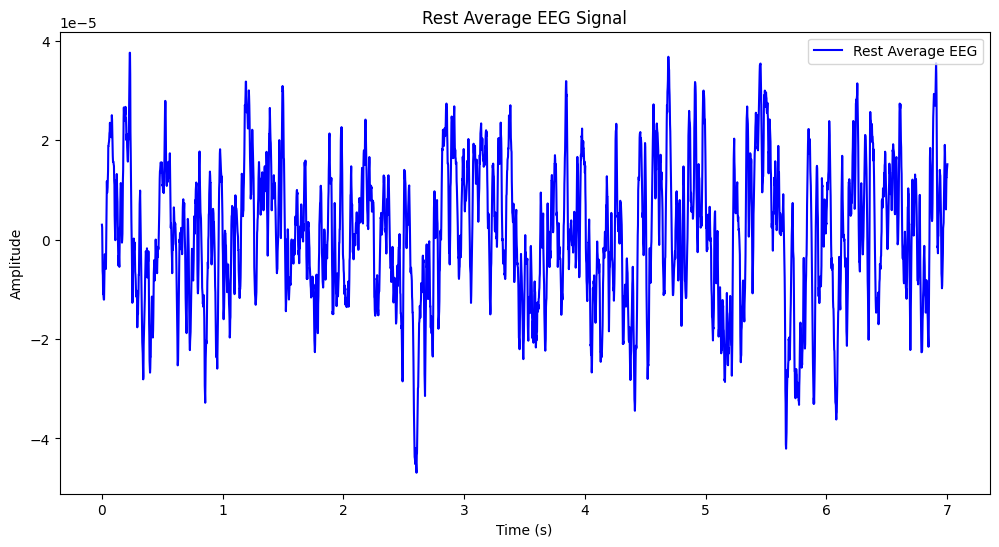


Computing and Plotting Move Average EEG...
Segment shape: (68, 3616)
Segment shape: (68, 3590)
Segment shape: (68, 3614)
Segment shape: (68, 3607)
Segment shape: (68, 496)
Segment shape: (68, 3593)
Segment shape: (68, 3604)
Segment shape: (68, 3597)
Segment shape: (68, 3593)
Segment shape: (68, 3600)


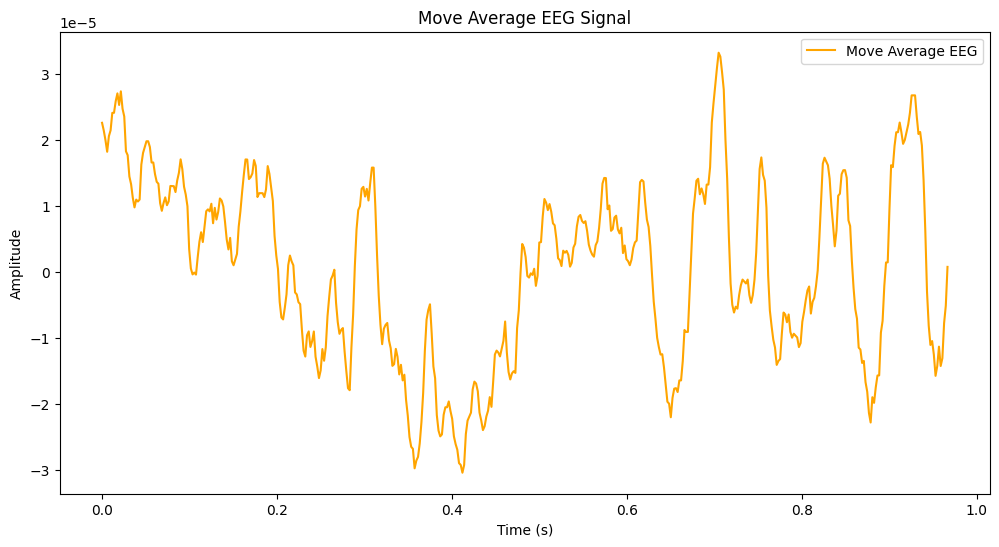

In [109]:
# Compute and plot the average of all segments
def compute_and_plot_average_eeg(start_events, end_events, title, color):
    all_segments = []  # For storing all event segments

    for start_event in event_positions:
        if start_event['event'][0] in start_events:
            start_sample = int(start_event['pos'][0][0] * sampling_rate)

            # Find the corresponding end event
            for end_event in event_positions:
                if end_event['event'][0] in end_events and end_event['pos'][0][0] > start_event['pos'][0][0]:
                    end_sample = int(end_event['pos'][0][0] * sampling_rate)
                    # if end_sample - start_sample < 3000:
                      # break

                    # Extract the signal segment
                    eeg_segment = eeg_data_filtered[:, start_sample:end_sample]
                    print(f"Segment shape: {eeg_segment.shape}")
                    mean_eeg_segment = np.mean(eeg_segment, axis=0)  # Compute the average of each segment
                    all_segments.append(mean_eeg_segment)
                    break

    if all_segments:
        min_length = min(segment.shape[0] for segment in all_segments)

        # Truncate all segments to the shortest length
        truncated_segments = [segment[:min_length] for segment in all_segments]

        # Compute the global average
        global_mean_eeg = np.mean(truncated_segments, axis=0)

        # Plot the global average
        plt.figure(figsize=(12, 6))
        plt.plot(
            np.arange(len(global_mean_eeg)) / sampling_rate,
            global_mean_eeg,
            label=f"{title} Average EEG",
            color=color
        )
        plt.title(f"{title} Average EEG Signal")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.legend(loc='upper right')
        plt.show()

# Load the .mat file
mat_file_path = '/content/mat_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.mat'
'''
/content/mat_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.mat
/content/mat_210_022/Subject_210_FES_Online__feedback_n_s002_r005_2025_04_04_111022.mat
/content/mat_210_022/Subject_210_FES_Online__feedback_n_s002_r006_2025_04_04_111729.mat
'''
mat_data = scipy.io.loadmat(mat_file_path)

# Extract events and EEG data
event_positions = mat_data['event_positions'][0]
eeg_data = mat_data['eeg_data']
# eeg_data = mat_data['eeg_data'][:67]
sampling_rate = mat_data['sampling_rate'][0][0]

eeg_data_filtered = preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit)

# Define event types
rest_starts = ['7691']
move_starts = ['7701']
rest_ends = ['7692', '7693']
move_ends = ['7702', '7703']

# Plot the averages for "Rest" and "Move" segments
print("\nComputing and Plotting Rest Average EEG...")
compute_and_plot_average_eeg(rest_starts, rest_ends, "Rest", color='blue')

print("\nComputing and Plotting Move Average EEG...")
compute_and_plot_average_eeg(move_starts, move_ends, "Move", color='orange')


## Utils for Final Grand Average
i choose to ignore the abnormal data here for the total number is only 3 trial

if that's not appropriate you can edit in this section


```
if end_sample - start_sample < 3000:
    break
```

and if the channel number is 67 you can use


```
eeg_data = mat_data['eeg_data'][:67]
# if the channel number is 67 you can use this instead
```

ps: i gusse you need the actual grand average data so i didn't run the 67 channel graph, sorry if i was wrong


In [88]:
# Compute and plot grand average
def compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, title):
    all_rest_segments = []
    all_move_segments = []

    # Iterate through .mat files in the folder
    for file_name in os.listdir(mat_folder):
        if file_name.endswith('.mat'):
            file_path = os.path.join(mat_folder, file_name)
            mat_data = scipy.io.loadmat(file_path)

            # Extract EEG data and event information
            eeg_data = mat_data['eeg_data']

            # eeg_data = mat_data['eeg_data'][:67]
            # if the channel number is 67 you can use this instead

            sampling_rate = mat_data['sampling_rate'][0][0]
            event_positions = mat_data['event_positions'][0]

            # Preprocess EEG data
            eeg_data_filtered = preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit)

            # Extract rest and move EEG segments
            for start_event in event_positions:
                start_sample = int(start_event['pos'][0][0] * sampling_rate)
                if start_event['event'][0] in rest_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in rest_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                              break
                              # ignore the abnormal data

                            segment = np.mean(eeg_data_filtered[:, start_sample:end_sample], axis=0)
                            all_rest_segments.append(segment)
                            break
                elif start_event['event'][0] in move_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in move_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                              continue
                            segment = np.mean(eeg_data_filtered[:, start_sample:end_sample], axis=0)
                            all_move_segments.append(segment)
                            break

    # Compute and plot grand average
    def plot_segments(segments, title, color):
        if segments:
            min_length = min(seg.shape[0] for seg in segments)
            truncated_segments = [seg[:min_length] for seg in segments]
            grand_average = np.mean(truncated_segments, axis=0)

            plt.figure(figsize=(12, 6))
            plt.plot(np.arange(len(grand_average)) / sampling_rate, grand_average, label=title, color=color)
            plt.title(f"{title} Grand Average EEG")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.legend(loc='upper right')
            plt.grid()
            plt.show()
        else:
            print(f"No segments found for {title}.")

    # Plot grand average for Rest and Move
    plot_segments(all_rest_segments, title + ": Rest", 'blue')
    plot_segments(all_move_segments, title + ": Move", 'orange')

# Parameter settings
lowcut = 0.5  # Low-frequency boundary (Hz)
highcut = 45  # High-frequency boundary (Hz)
amp_limit = 100 * 1e-6  # Amplitude limit (-100 μV to 100 μV)
rest_starts = ['7691']
move_starts = ['7701']
rest_ends = ['7692', '7693']
move_ends = ['7702', '7703']

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


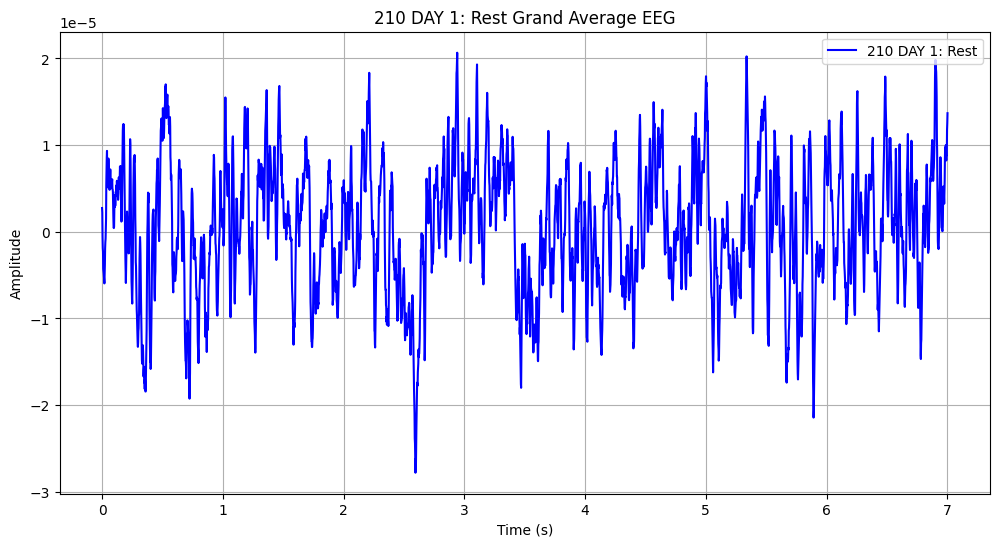

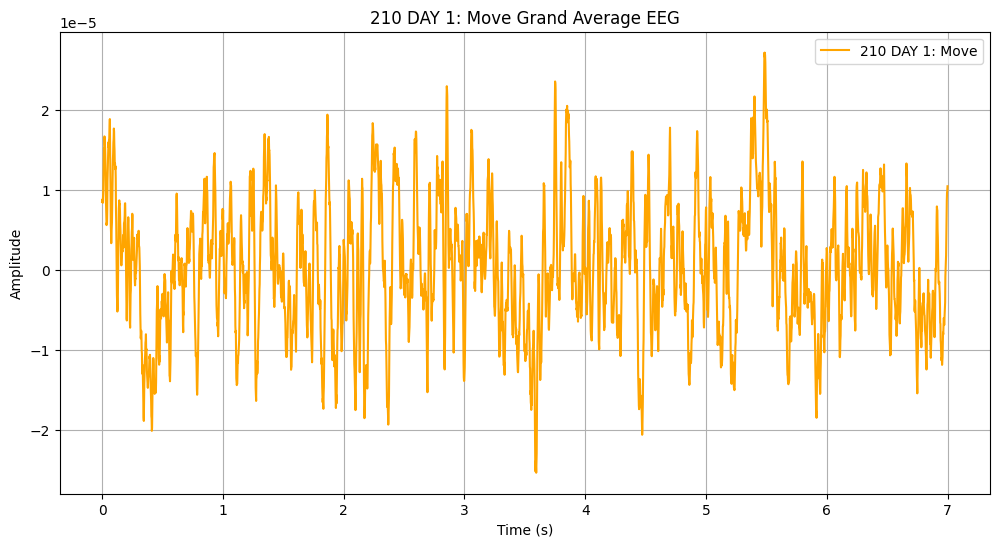

In [89]:
mat_folder = '/content/mat_210_010'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 1')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


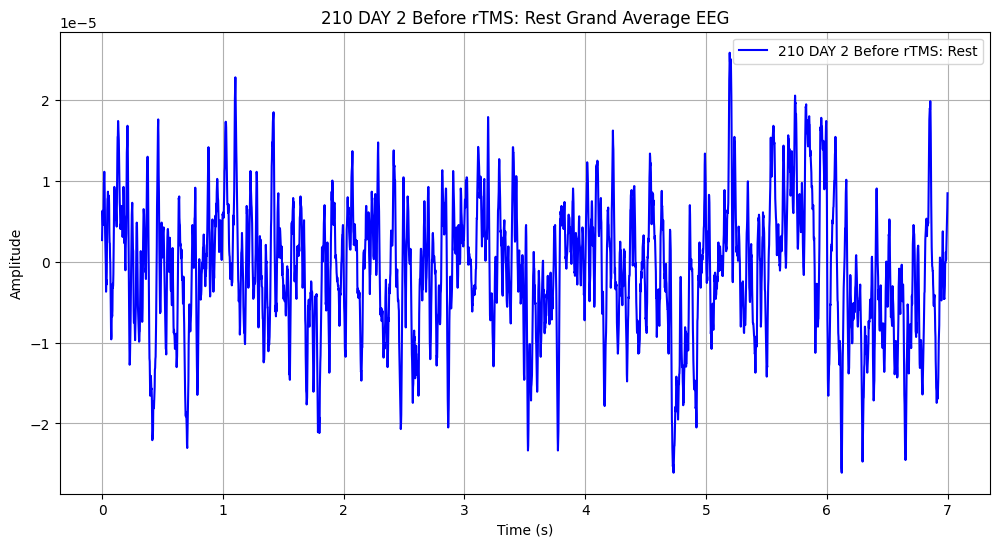

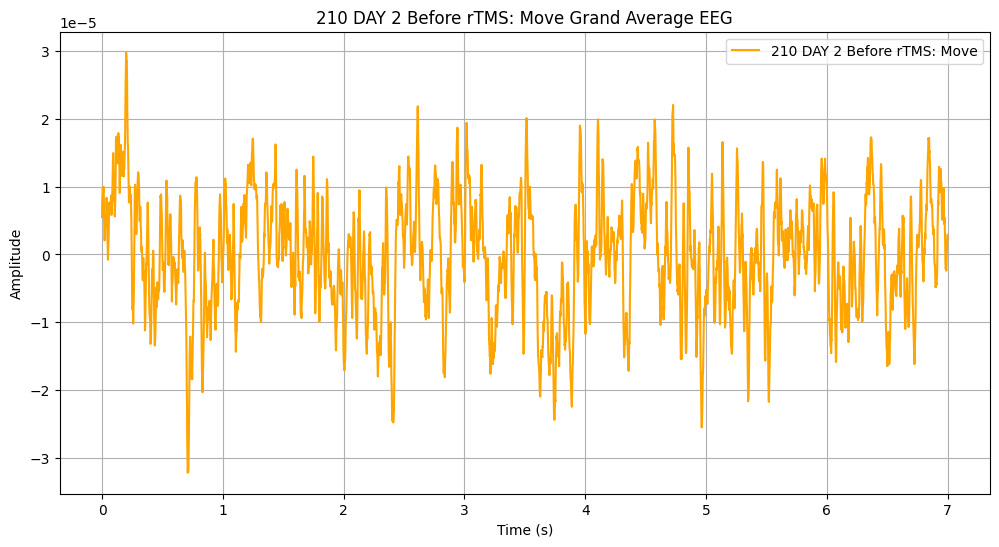

In [90]:
mat_folder = '/content/mat_210_021'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 2 Before rTMS')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


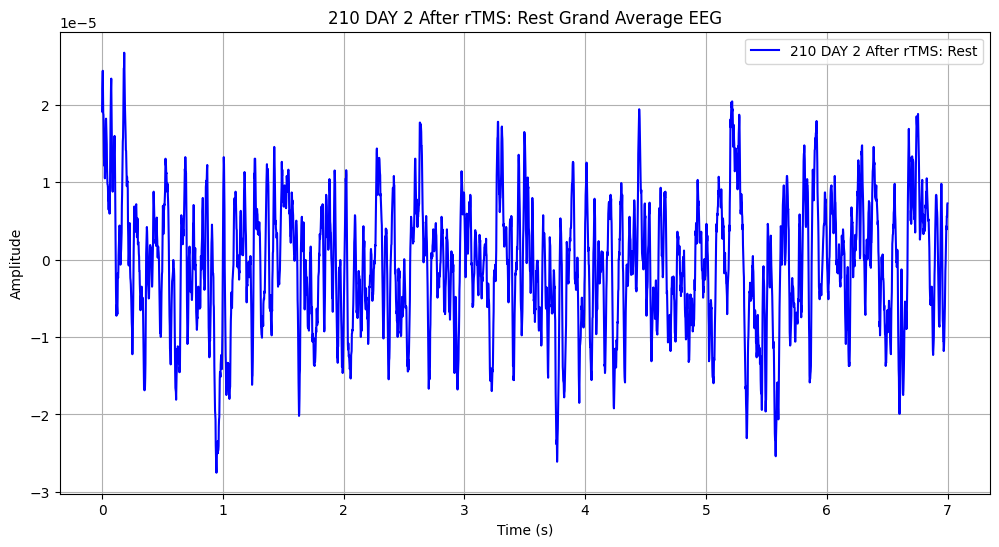

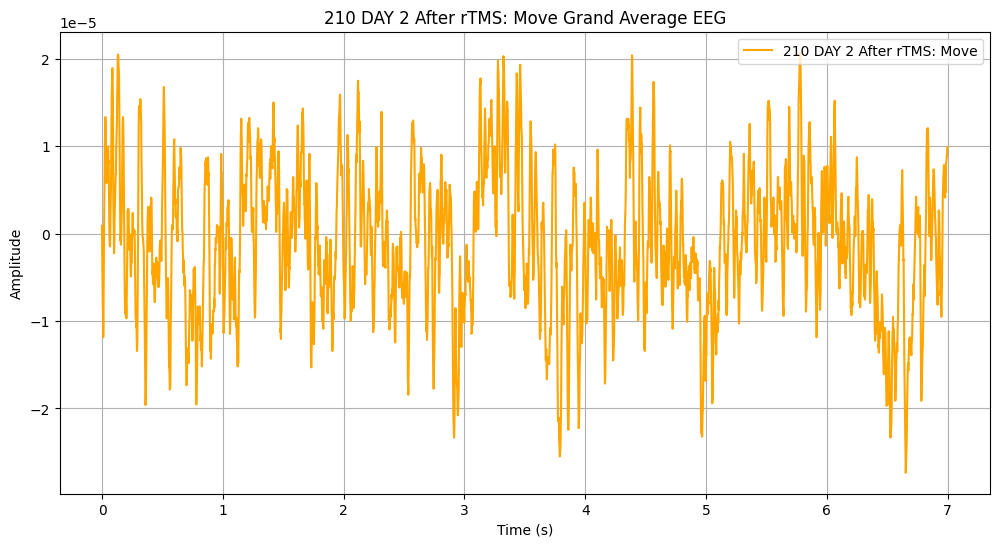

In [91]:
mat_folder = '/content/mat_210_022'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 2 After rTMS')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


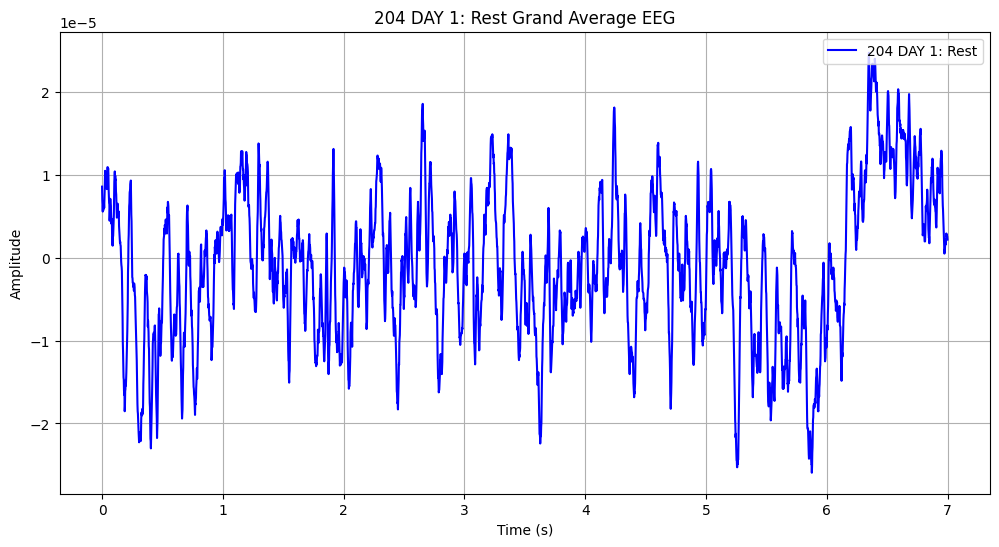

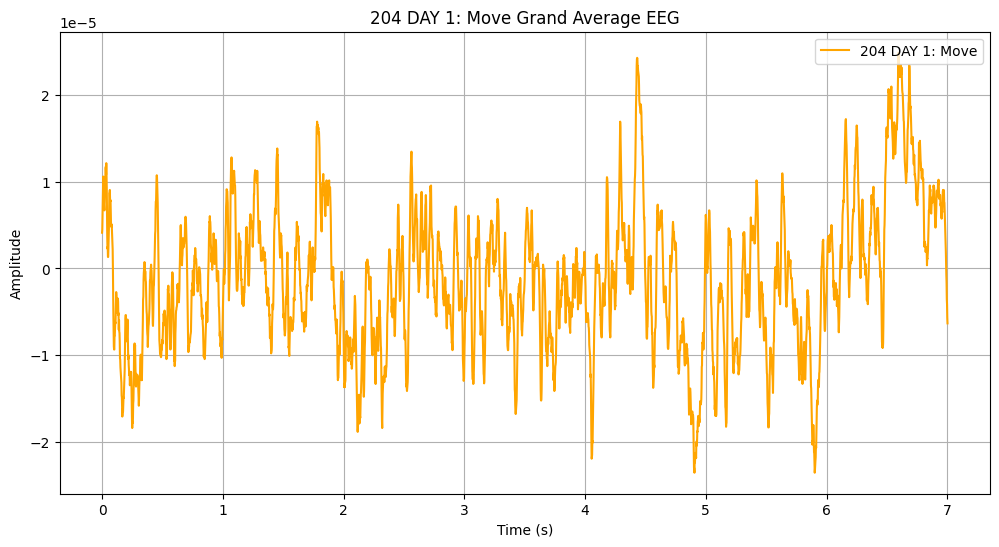

In [95]:
mat_folder = '/content/mat_204_010'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 1')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


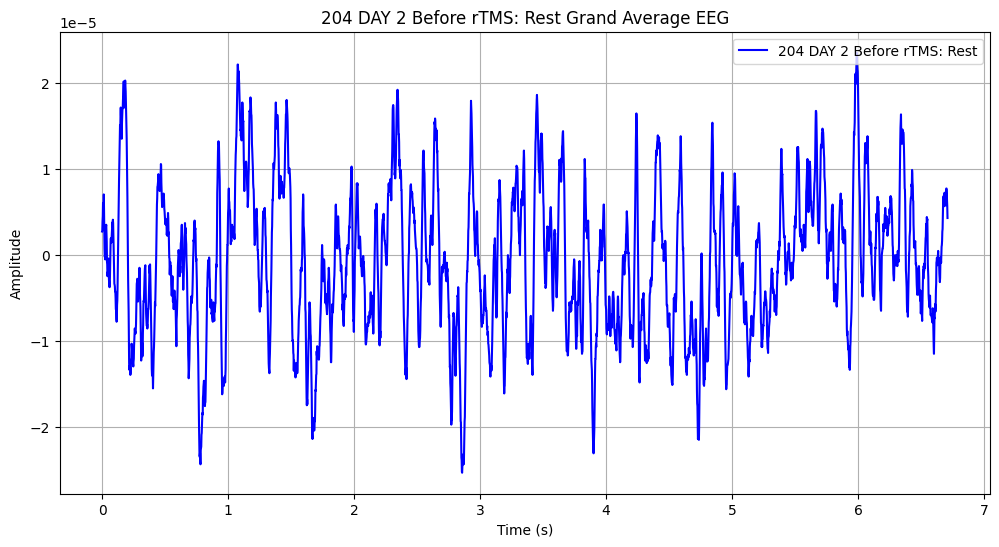

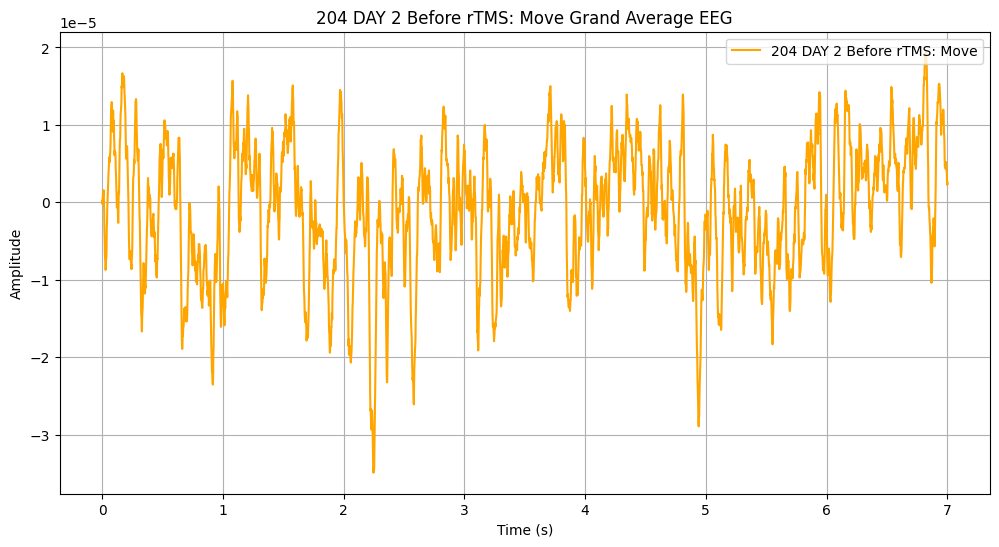

In [96]:
mat_folder = '/content/mat_204_021'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 2 Before rTMS')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


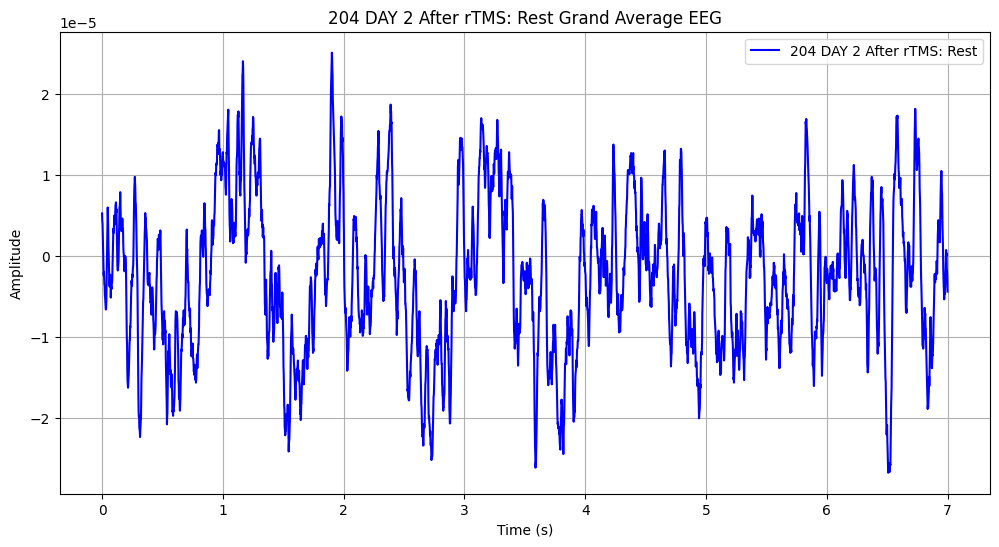

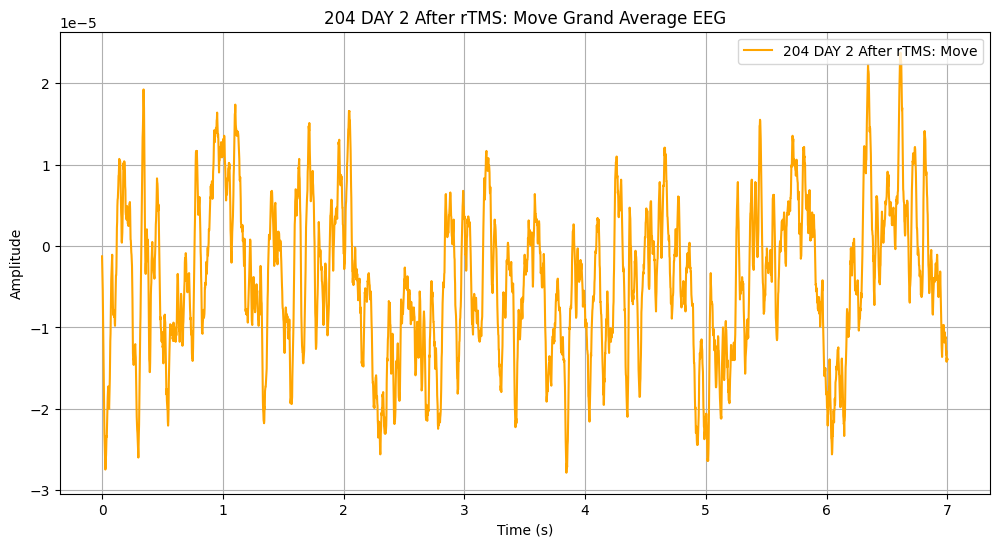

In [97]:
mat_folder = '/content/mat_204_022'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 2 After rTMS')